<AxesSubplot:xlabel='State'>

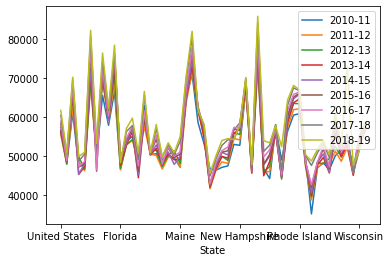

In [2]:
# IDK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataFilePath import *

filePaths = getFilePaths("Unit_3")

dataDict = {}

for file in filePaths:
    dataDict[file] = pd.read_csv(filePaths[file])

# salary data
# salaryData = pd.read_csv(salaryPath)
# salaryData.set_index(salaryData["State"], inplace = True)
# salaryData.drop(columns=["State"], inplace = True)

# salaryData.plot.line()


Corralation: 0.6925365688154659
Days: 220
3872
1


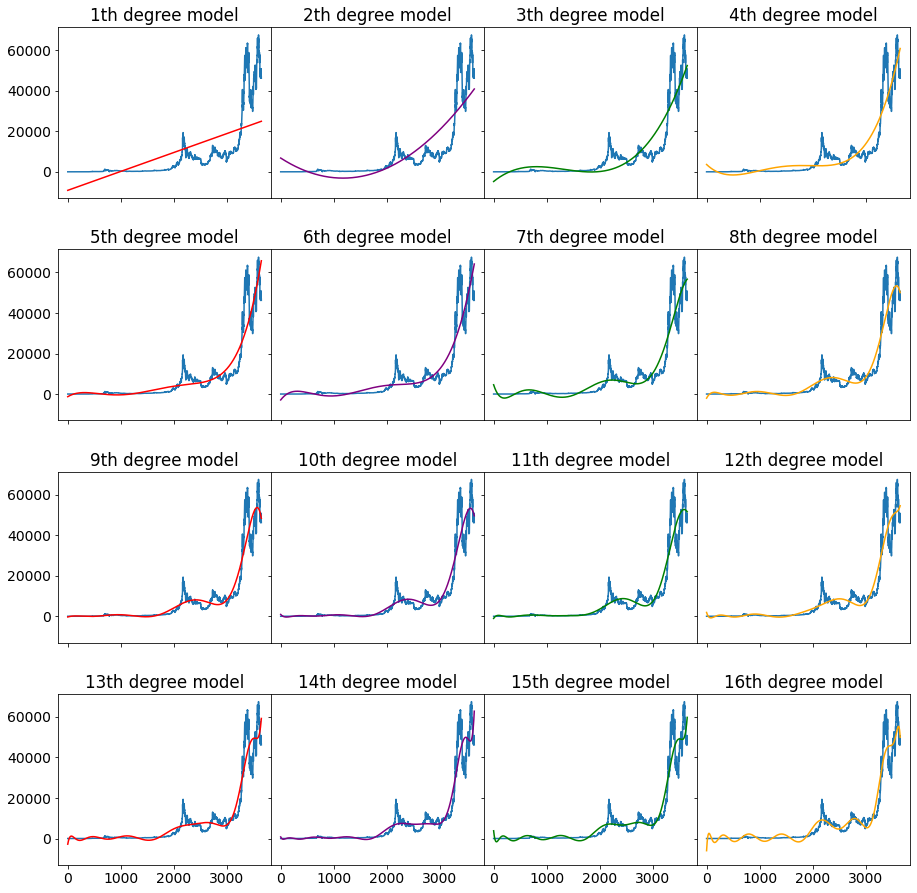

In [43]:
# Price over time / Modeling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = {"coin_BTC": r"c:\Users\7544501\Documents\School-Data-Science\Unit_3\Data\coin_BTC.csv"}

BTCData = pd.read_csv(path["coin_BTC"])
#not setting index to be date so i have ints to use
# BTCData.set_index(BTCData["Date"], inplace = True)
# BTCData.drop(columns=["Date"], inplace = True) 
# BTCData.index = pd.to_datetime(BTCData.index)
# print(BTCData)

BTCData.Date = pd.to_datetime(BTCData.Date)
BTCData.sort_values(by="Date", inplace=True, ascending=True) 
BTCData.reset_index(drop=True, inplace=True)
#0000: 2012-01-01
#3652: 2021-12-31
# print(BTCData.iloc[:1,:])

x = BTCData.index
y = BTCData.Price
xSeries = pd.Series(x) #corr doesnt like indexSeries so have to make into reg series

height = 4
width = 4
totalPlots = 9

fig = plt.figure()
fig.set_size_inches(14,14)
matplotlib.rcParams.update({'font.size': 14})
gs = fig.add_gridspec(height, width, hspace=0.3, wspace=0, top=0.967, right=0.945, left=0.1, bottom=0.136)
gs.subplots(sharex=True, sharey=True)

axs = fig.axes
# y.corr(xSeries)

print(f"Corralation: {y.corr(xSeries)}")

xRange = range(x.min(), x.max()+1)

colors = ["Orange", "Red", "Purple", "Green"]

guessDay = pd.to_datetime("2021-05-25")
guessDayPrice = 29000 #about
dayDifference = (BTCData.iloc[-1, 0] - guessDay).days
print(f"Days: {dayDifference}")
guessIndex = BTCData.index[-1] + dayDifference
print(guessIndex)

guesses = {}
differences = {}

i=1
for ax in axs:

    ax.set_title(f"{i}th degree model")
    ax.plot(x,y)

    model = np.polyfit(x,y,i)
    predict = np.poly1d(model)

    # print(f"Predicted {predict(guessIndex)} price with {i}th degree model")
    # print(f"That is {predict(guessIndex) - guessDayPrice} off of the actual price")
    guesses[i] = predict(guessIndex)
    differences[i] = predict(guessIndex) - guessDayPrice
    yValues = predict(xRange)

    ax.plot(xRange, yValues, color=colors[i%len(colors)])

    i += 1

print(min(differences)) #heh, linear best

<AxesSubplot:title={'center':'Price Over Time'}, xlabel='Date', ylabel='Price'>

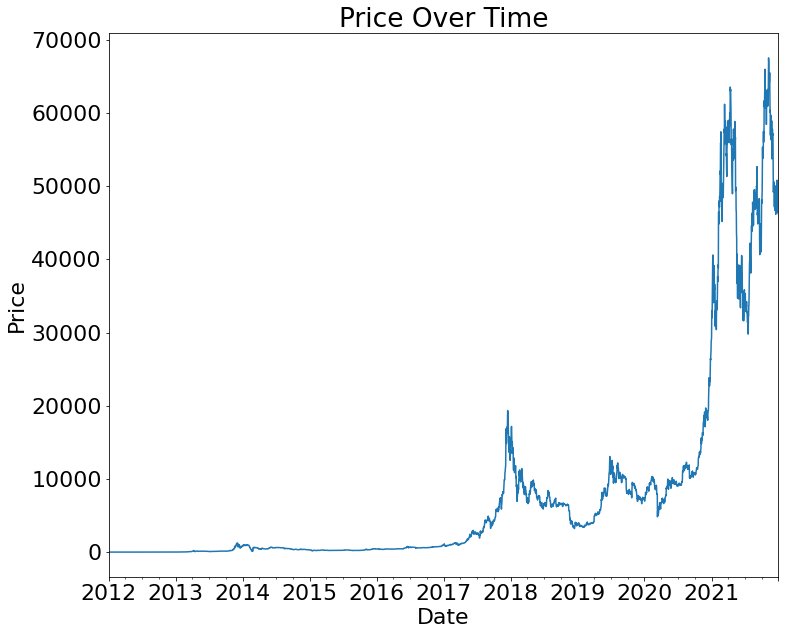

In [40]:
# Price over Time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from scipy.stats import norm
from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)

fig = plt.figure()
fig.set_size_inches(12,10)
matplotlib.rcParams.update({'font.size': 22})


plt.ylabel("Price")
plt.title("Price Over Time")
BTCData["Price"].plot.line()

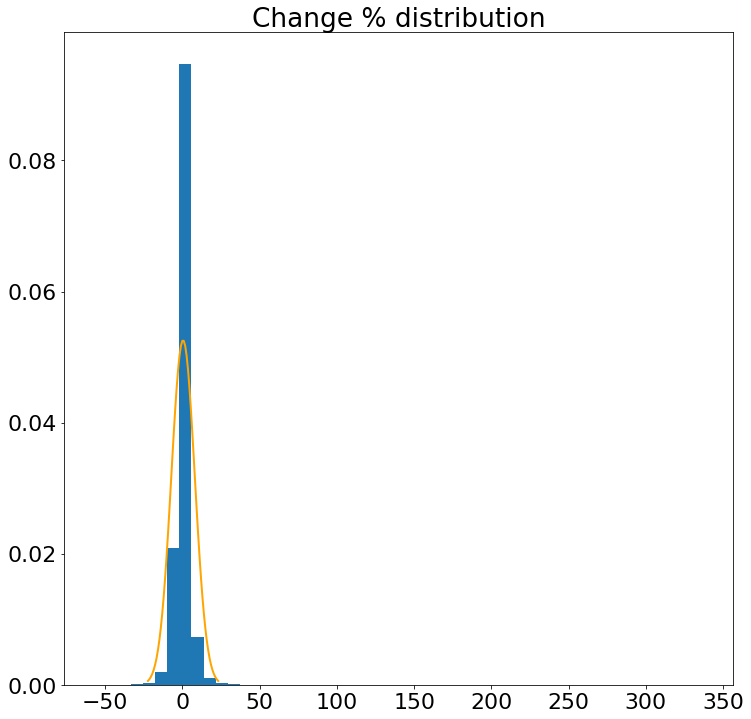

In [26]:
# Histogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from scipy.stats import norm
from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)

BTCData["Volume"] = BTCData["Vol."]
VolColumnNumber = 6
for i in range(len(BTCData["Vol."])):
    BTCData.iloc[i, -1:] = int(float(BTCData.iloc[i, VolColumnNumber][:-1]) * 1000)

fig = plt.figure()
fig.set_size_inches(12,12)
matplotlib.rcParams.update({'font.size': 22})

plt.title("Change % distribution")

data = BTCData["Change %"] # BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 3)]["Change %"]

plt.hist(data, density=True, bins=50)

mean = data.mean()
median = data.median()
std = data.std()

xmin = mean - 3 * std
xmax = mean + 3 * std

x = np.linspace(xmin, xmax)
y = norm.pdf(x, mean, std)

plt.plot(x, y, color="orange", linewidth=2) 

# plt.hist(BTCData.drop(index=[pd.to_datetime("2014-02-26"), pd.to_datetime("2014-02-22")])["Change %"], bins=10, density=True)

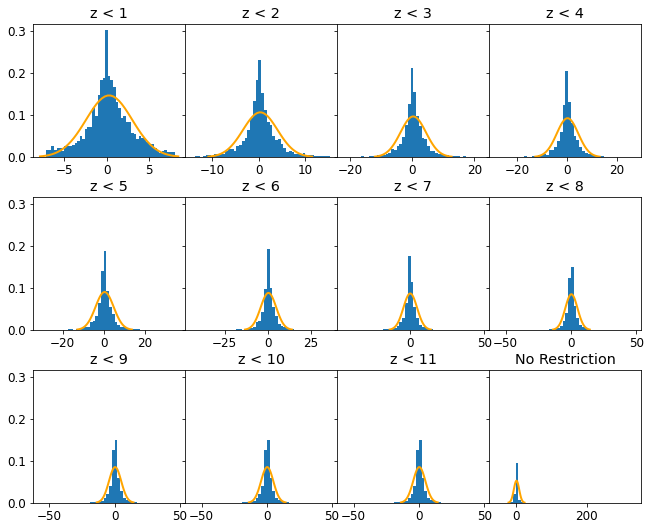

In [30]:
# Multi Histogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)

height = 3
width = 4
totalPlots = 9

fig = plt.figure()
fig.set_size_inches(10,8)
matplotlib.rcParams.update({'font.size': 12})

gs = fig.add_gridspec(height, width, hspace=0.3, wspace=0, top=0.967, right=0.945, left=0.1, bottom=0.136)
gs.subplots(sharex=False, sharey=True)

axs = fig.axes

# colors = ["Orange", "Red", "Purple", "Green"]

i = 1
# print(len(axs))
for ax in axs:
    if i == len(axs):
        data = BTCData["Change %"]
        ax.set_title("No Restriction")
    else: 
        data = BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < i)]["Change %"]
        ax.set_title(f"z < {i}")


    
    ax.hist(data, density=True, bins=50)

    mean = data.mean()
    median = data.median()
    std = data.std()

    xmin = mean - 3 * std
    xmax = mean + 3 * std

    x = np.linspace(xmin, xmax)
    y = norm.pdf(x, mean, std)

    ax.plot(x, y, color="orange", linewidth=2) 

    i += 1

# plt.hist(BTCData.drop(index=[pd.to_datetime("2014-02-26"), pd.to_datetime("2014-02-22")])["Change %"], bins=10, density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d857318bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d857309190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8573188e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d857309730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d857309a00>],
 'means': []}

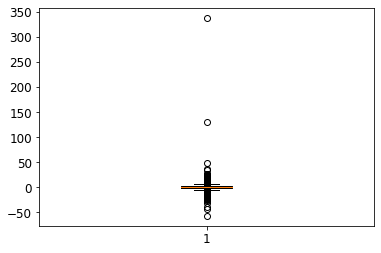

In [31]:
# Boxplot
# %load notebookImport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)

# plt.boxplot(BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 3)]["Change %"])
plt.boxplot(BTCData["Change %"])

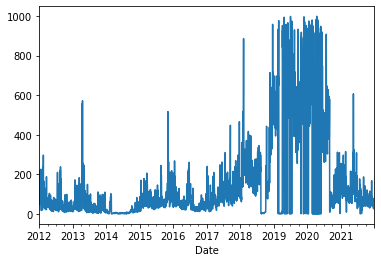

In [7]:
# Volume over time
# %load notebookImport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)

BTCData["Volume"] = BTCData["Vol."]
VolColumnNumber = 6
for i in range(len(BTCData["Vol."])):
    BTCData.iloc[i, -1:] = int(float(BTCData.iloc[i, VolColumnNumber][:-1]))

BTCData.loc[:, "Volume"].plot.line()

x = BTCData.index
y = BTCData["Volume"]

# plt.scatter(x,y)

Line of best fit: y = -0.0007775173644912985x + 0.4439740350743566
Corralation: -0.03701674939831113


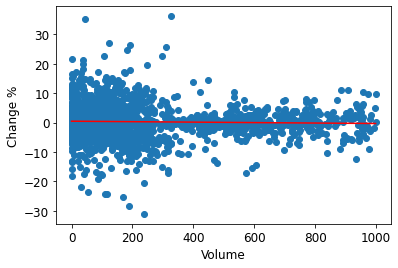

In [33]:
# Volume vs Change %
# %load notebookImport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)


BTCData["Volume"] = BTCData["Vol."]
BTCData["VolumeK"] = BTCData["Vol."]
VolColumnNumber = 6
for i in range(len(BTCData["Vol."])):
    BTCData.iloc[i, -2:-1] = float(BTCData.iloc[i, VolColumnNumber][:-1]) * 1000
    BTCData.iloc[i, -1:] = float(BTCData.iloc[i, VolColumnNumber+1][:-1])
BTCData["Volume"] = BTCData["Volume"].astype("int")
BTCData["VolumeK"] = BTCData["VolumeK"].astype("int")


# [1000 for i in range(len(BTCData["Vol."]))]

plt.xlabel("Volume")
plt.ylabel("Change %")


x = BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 5)]["VolumeK"]
y = BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 5)]["Change %"]

# print(BTCData.dtypes)

plt.scatter(x,y)

model = np.polyfit(x,y,1)
predict = np.poly1d(model)

xRange = range(x.min(), x.max())
yValues = predict(xRange)

plt.plot(xRange,yValues, color="red")

print(f"Line of best fit: y = {model[0]}x + {model[1]}")
print(f"Corralation: {y.corr(x)}")
